In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\kondu\Music\Ischemic Stroke\DATASET\brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.columns = df.columns.str.strip()

In [4]:
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [9]:
from sklearn.utils import resample
# Separate majority and minority classes
# Converting 'stroke' to numeric before filtering
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')

df_majority = df[df['stroke'] == 0]
df_minority = df[df['stroke'] == 1]

# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=4000, random_state=100)
df_majority_downsampled = resample(df_majority, replace=True, n_samples=4000, random_state=100)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])

# Display new class counts
df_balanced['stroke'].value_counts()

1    4000
0    4000
Name: stroke, dtype: int64

In [10]:
df = df_balanced

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns that are of type 'object' (categorical features)
object_cols = df.select_dtypes(include=['object']).columns

# Convert all object-type columns to string (to handle mixed types)
for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all data in the column is treated as string

# Apply label encoding to each object-type column
for col in object_cols:
    df[col] = le.fit_transform(df[col])

# Check the result (first few rows)
print(df.head())

     gender   age  hypertension  heart_disease  ever_married  work_type  \
8         0  81.0             1              0             1          1   
24        1  57.0             1              0             1          1   
67        0  68.0             1              0             0          2   
103       1  56.0             1              0             1          1   
87        0  57.0             0              0             1          0   

     Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
8                 0              80.43  29.7               2       1  
24                1             212.08  44.2               3       1  
67                1              79.79  29.7               2       1  
103               0             249.31  35.8               2       1  
87                1             110.52  28.5               0       1  


In [12]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.025080,0.009527,0.132434,0.041141,0.040746,-0.009660,0.118891,0.020626,-0.043118,0.024580
age,0.025080,1.000000,0.264137,0.267060,0.557315,-0.287421,0.018222,0.275511,0.236305,0.184728,0.569862
hypertension,0.009527,0.264137,1.000000,0.083510,0.087717,-0.003522,-0.007367,0.146584,0.101440,0.140752,0.221618
heart_disease,0.132434,0.267060,0.083510,1.000000,0.066755,-0.063355,0.025359,0.260343,0.063601,0.090577,0.214740
ever_married,0.041141,0.557315,0.087717,0.066755,1.000000,-0.295554,-0.047859,0.191441,0.294804,0.195406,0.280766
work_type,0.040746,-0.287421,-0.003522,-0.063355,-0.295554,1.000000,0.013016,-0.114675,-0.268897,-0.225640,-0.104454
Residence_type,-0.009660,0.018222,-0.007367,0.025359,-0.047859,0.013016,1.000000,0.031880,0.007853,-0.021407,0.031315
avg_glucose_level,0.118891,0.275511,0.146584,0.260343,0.191441,-0.114675,0.031880,1.000000,0.268539,0.077403,0.250170
bmi,0.020626,0.236305,0.101440,0.063601,0.294804,-0.268897,0.007853,0.268539,1.000000,0.164174,0.136838
smoking_status,-0.043118,0.184728,0.140752,0.090577,0.195406,-0.225640,-0.021407,0.077403,0.164174,1.000000,0.060221


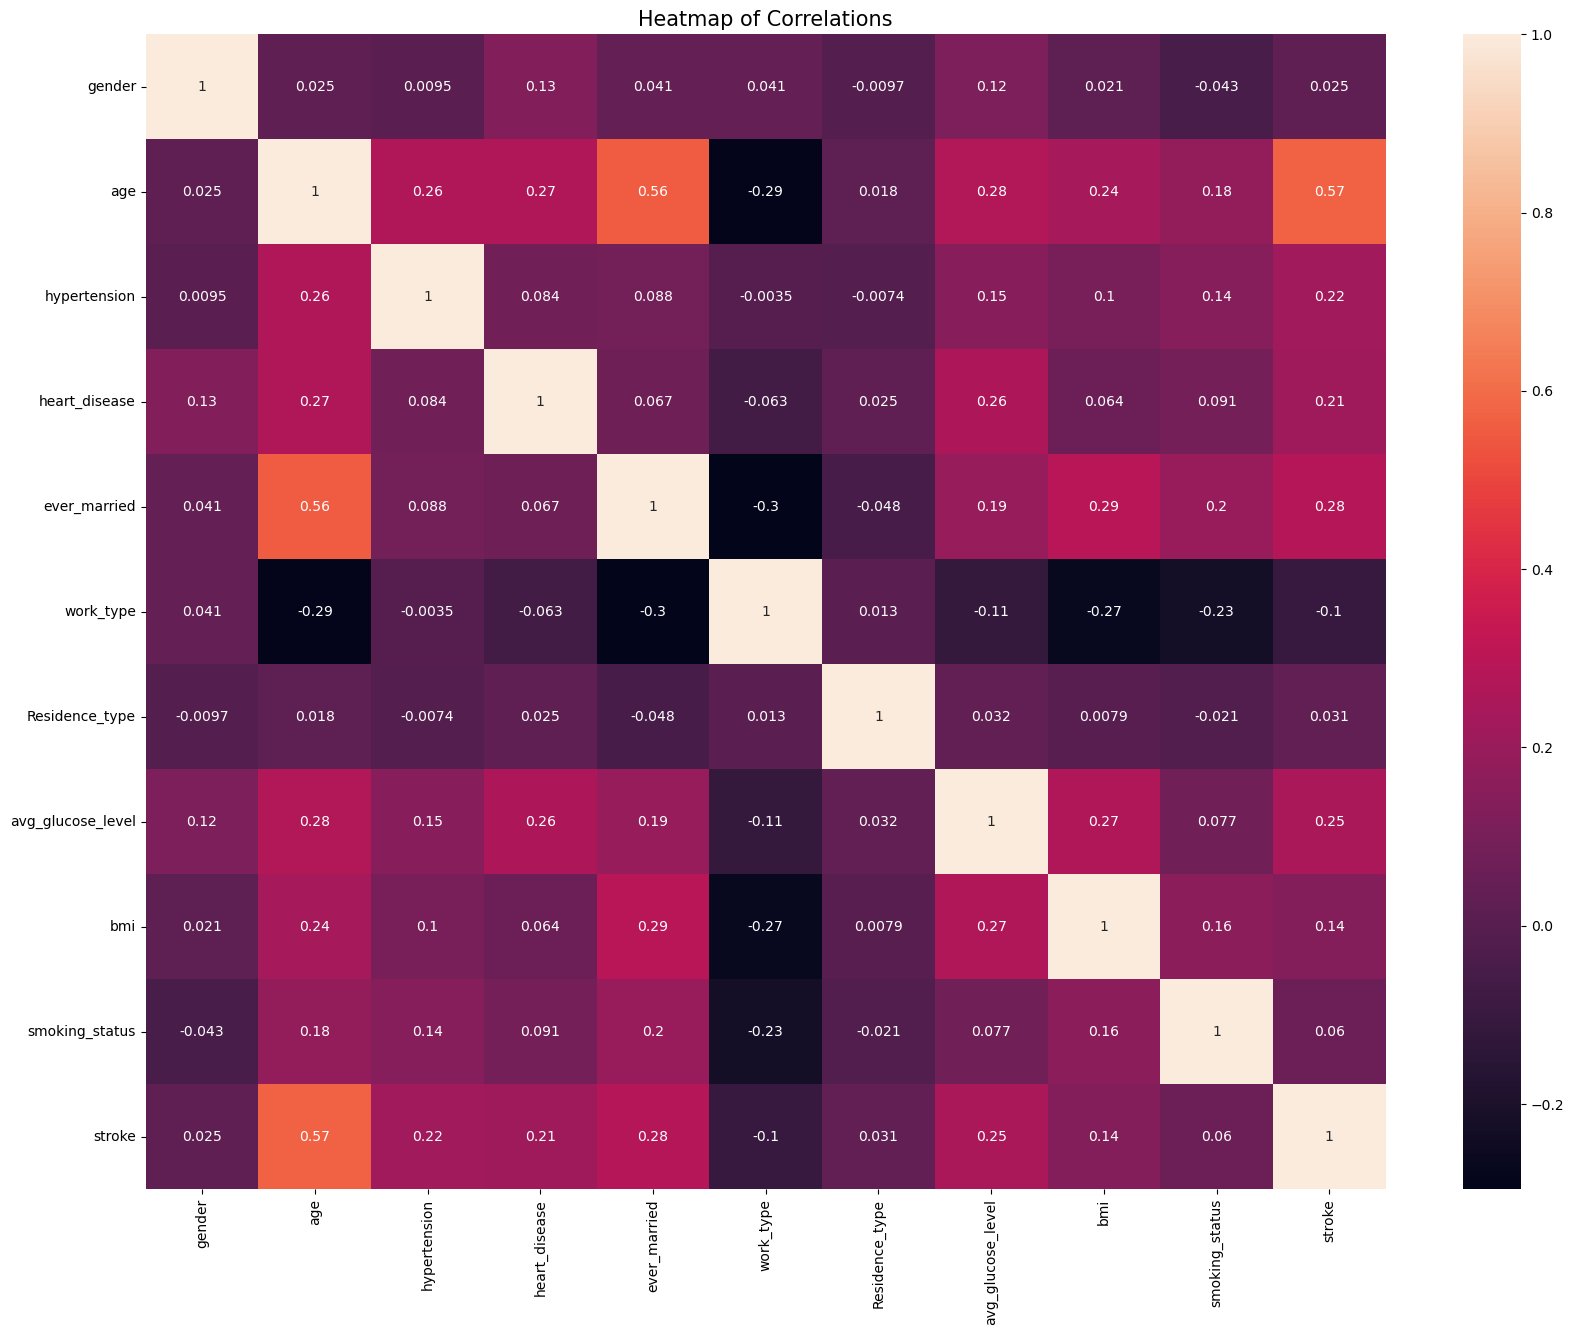

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [14]:
x = df.drop(columns=['stroke'])
y = df['stroke']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.transform(x_test)

In [16]:
x_train.shape

(6000, 10)

In [17]:
import numpy as np

# Reshape the data for CNN
x_train_cnn = np.expand_dims(x_train, axis=2)  # Adding a channel dimension
x_test_cnn = np.expand_dims(x_test, axis=2)

In [18]:
# First lets add the necessary import for Label Encoding the y values
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape), #Added padding='same'
        MaxPooling1D(pool_size=2),
        Conv1D(32, kernel_size=3, activation='relu', padding='same'), #Added padding='same'
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Encode the y values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Build the model
cnn_model = build_cnn_model((x_train_cnn.shape[1], 1))

import pickle
pickle.dump(cnn_model, open(r'C:\Users\kondu\Music\Ischemic Stroke\FRONTEND\cnn.pkl', 'wb'))

#Print the summary after the model has been made
print(cnn_model.summary())

# Train the model
history_cnn = cnn_model.fit(x_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,881 (58.13 KB)

 Trainable params: 14,881 (58.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5982 - loss: 1.3205 - val_accuracy: 0.6358 - val_loss: 0.6645
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7061 - loss: 0.5700 - val_accuracy: 0.6908 - val_loss: 0.5568
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7253 - loss: 0.5564 - val_accuracy: 0.6900 - val_loss: 0.5675
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7370 - loss: 0.5309 - val_accuracy: 0.6858 - val_loss: 0.6363
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7561 - loss: 0.5161 - val_accuracy: 0.7267 - val_loss: 0.5354
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7492 - loss: 0.5108 - val_accuracy: 0.7383 - val_loss: 0.5316
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7628 - loss: 0.4962 - val_accuracy: 0.7350 - val_loss: 0.5225
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7584 - loss: 0.4952 - va

Epoch 51/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7892 - loss: 0.4438 - val_accuracy: 0.7483 - val_loss: 0.4732
Epoch 52/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7731 - loss: 0.4559 - val_accuracy: 0.7475 - val_loss: 0.4753
Epoch 53/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7810 - loss: 0.4529 - val_accuracy: 0.7492 - val_loss: 0.4722
Epoch 54/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7893 - loss: 0.4422 - val_accuracy: 0.7700 - val_loss: 0.4689
Epoch 55/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7845 - loss: 0.4462 - val_accuracy: 0.7483 - val_loss: 0.4801
Epoch 56/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7784 - loss: 0.4507 - val_accuracy: 0.7575 - val_loss: 0.4664
Epoch 57/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7746 - loss: 0.4525 - val_accuracy: 0.7533 - val_loss: 0.4732
Epoch 58/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7806 - loss: 0.4535 - 

In [19]:
# Evaluate on test data
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print(f"Test Loss: {cnn_loss:.4f}, Test Accuracy: {cnn_accuracy:.4f}")

# Make predictions
cnn_predictions = (cnn_model.predict(x_test_cnn) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7816 - loss: 0.4272
Test Loss: 0.4274, Test Accuracy: 0.7795
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


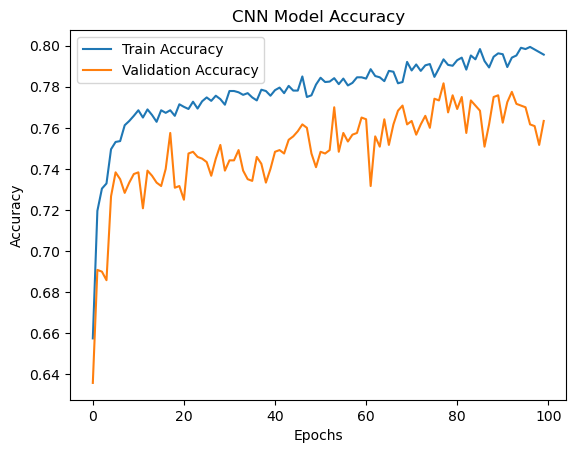

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

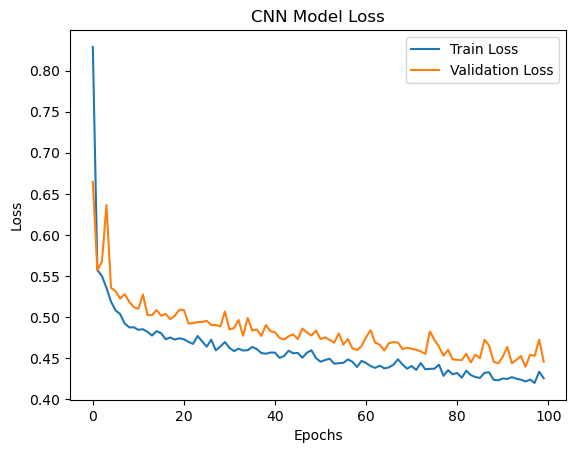

In [21]:
# Plot training & validation loss
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

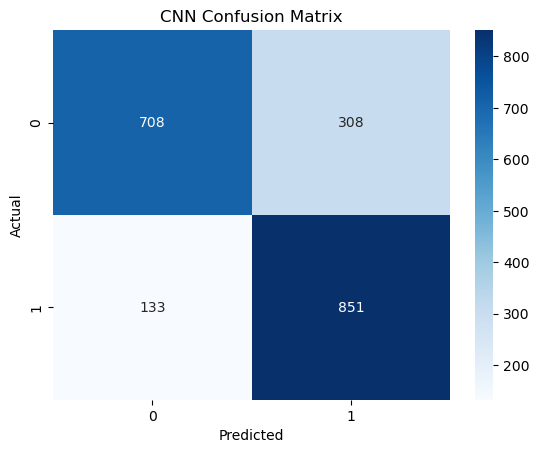

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1016
           1       0.73      0.86      0.79       984

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, cnn_predictions))

In [23]:
# Reshape the data for LSTM
x_train_lstm = np.expand_dims(x_train, axis=1)  # Adding a timestep dimension
x_test_lstm = np.expand_dims(x_test, axis=1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64, activation='tanh'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
lstm_model = build_lstm_model((x_train_lstm.shape[1], x_train_lstm.shape[2]))

print(lstm_model.summary())

# Train the model
history_lstm = lstm_model.fit(x_train_lstm, y_train, validation_split=0.2, epochs=50, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          71,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,801 (487.50 KB)

 Trainable params: 124,801 (487.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6592 - loss: 0.6223 - val_accuracy: 0.7317 - val_loss: 0.5412
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7481 - loss: 0.5228 - val_accuracy: 0.7317 - val_loss: 0.5390
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7634 - loss: 0.4993 - val_accuracy: 0.7200 - val_loss: 0.5852
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7640 - loss: 0.5007 - val_accuracy: 0.7300 - val_loss: 0.5180
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7642 - loss: 0.4908 - val_accuracy: 0.7383 - val_loss: 0.5047
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7646 - loss: 0.4834 - val_accuracy: 0.7367 - val_loss: 0.5020
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7674 - loss: 0.4702 - val_accuracy: 0.7300 - val_loss: 0.5059
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7623 - loss: 0.4816 - val_accura

In [25]:
# Evaluate on test data
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_lstm, y_test)
print(f"Test Loss: {lstm_loss:.4f}, Test Accuracy: {lstm_accuracy:.4f}")

# Make predictions
lstm_predictions = (lstm_model.predict(x_test_lstm) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - loss: 0.4427
Test Loss: 0.4496, Test Accuracy: 0.7715
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [26]:
import pickle
pickle.dump(lstm_model, open(r'C:\Users\kondu\Music\Ischemic Stroke\FRONTEND\lstm.pkl', 'wb'))

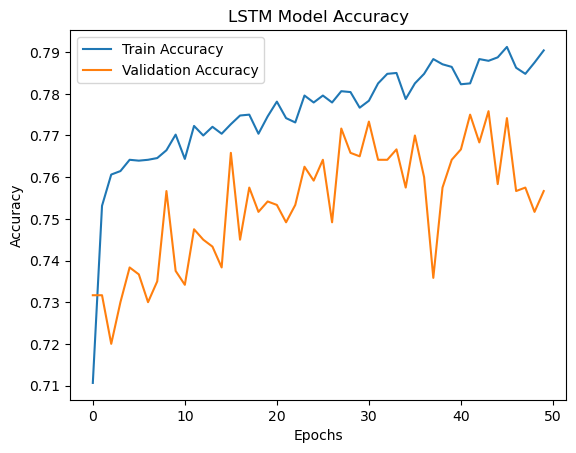

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

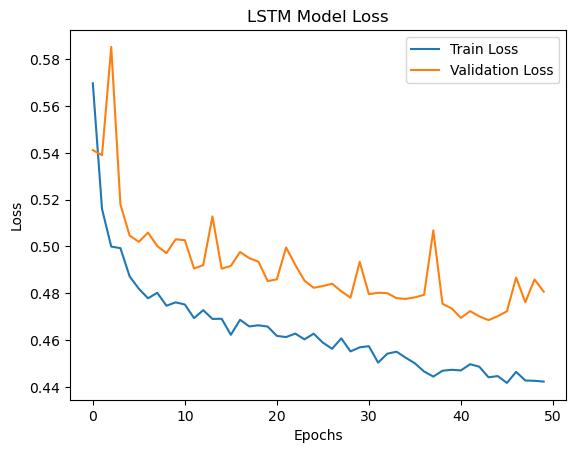

In [28]:
# Plot training & validation loss
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

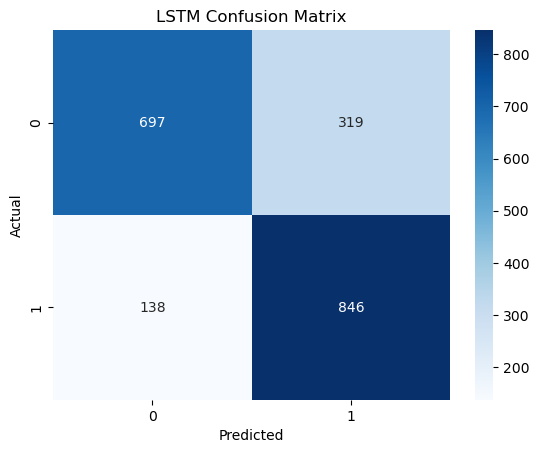

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1016
           1       0.73      0.86      0.79       984

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, lstm_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, lstm_predictions))

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout, Reshape
from sklearn.preprocessing import LabelEncoder

# Define the CNN-LSTM model
def build_cnn_lstm_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Reshape((input_shape[0] // 4, 32)),  # Adjust dimensions for LSTM
        LSTM(50, return_sequences=False),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Encode the y values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Build the model
cnn_lstm_model = build_cnn_lstm_model((x_train_cnn.shape[1], 1))

# Print the summary after the model has been made
print(cnn_lstm_model.summary())

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(x_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=32)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 10, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 5, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,689 (115.97 KB)

 Trainable params: 29,689 (115.97 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6751 - loss: 0.6008 - val_accuracy: 0.6900 - val_loss: 0.5921
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7494 - loss: 0.5049 - val_accuracy: 0.7392 - val_loss: 0.5250
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7493 - loss: 0.5071 - val_accuracy: 0.7317 - val_loss: 0.5321
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7597 - loss: 0.4971 - val_accuracy: 0.7408 - val_loss: 0.5167
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7599 - loss: 0.4941 - val_accuracy: 0.7492 - val_loss: 0.5111
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7569 - loss: 0.4930 - val_accuracy: 0.7508 - val_loss: 0.5124
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7586 - loss: 0.4864 - val_accuracy: 0.7408 - val_loss: 0.5145
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7552 - loss: 0.4945 - v

Epoch 51/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7886 - loss: 0.4261 - val_accuracy: 0.7717 - val_loss: 0.4600
Epoch 52/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8062 - loss: 0.4157 - val_accuracy: 0.7683 - val_loss: 0.4596
Epoch 53/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7959 - loss: 0.4200 - val_accuracy: 0.7692 - val_loss: 0.4643
Epoch 54/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7913 - loss: 0.4285 - val_accuracy: 0.7758 - val_loss: 0.4380
Epoch 55/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8013 - loss: 0.4128 - val_accuracy: 0.7650 - val_loss: 0.4517
Epoch 56/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8134 - loss: 0.4025 - val_accuracy: 0.7517 - val_loss: 0.4733
Epoch 57/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7959 - loss: 0.4188 - val_accuracy: 0.7550 - val_loss: 0.4592
Epoch 58/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8011 - loss: 0.4229 -

In [31]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_lstm_model.evaluate(x_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8667 - loss: 0.2970
Test Accuracy: 87.20%


In [32]:
import pickle
pickle.dump(cnn_lstm_model, open(r'C:\Users\kondu\Music\Ischemic Stroke\FRONTEND\cnn_lstm.pkl', 'wb'))

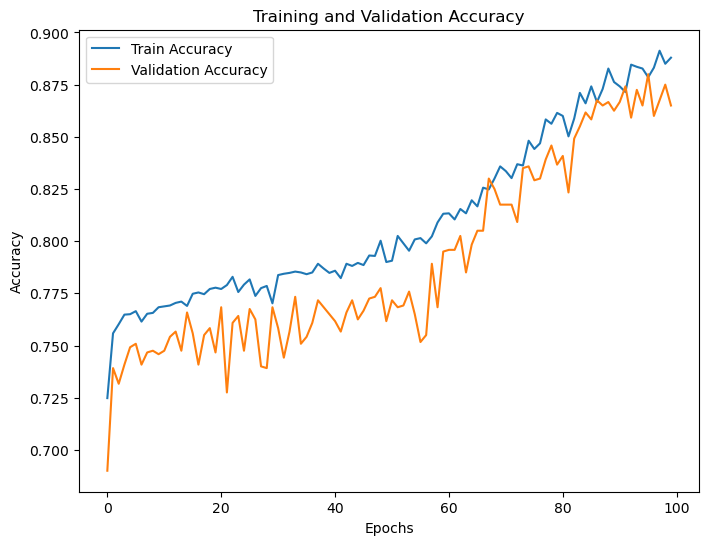

In [33]:
# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history_cnn_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

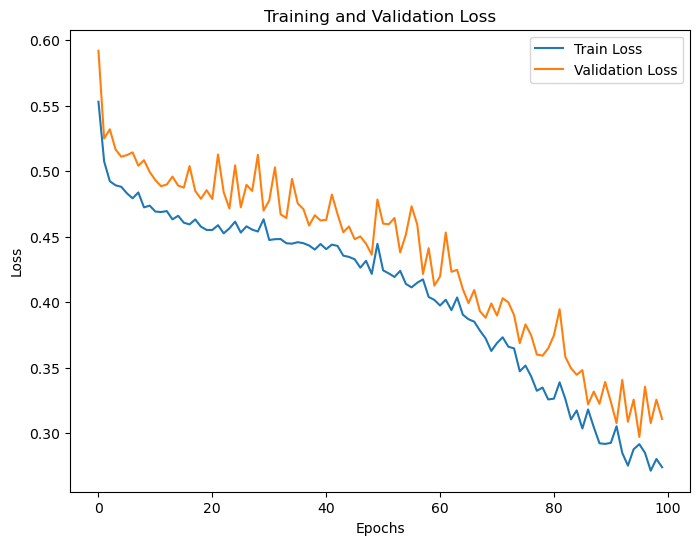

In [34]:
# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


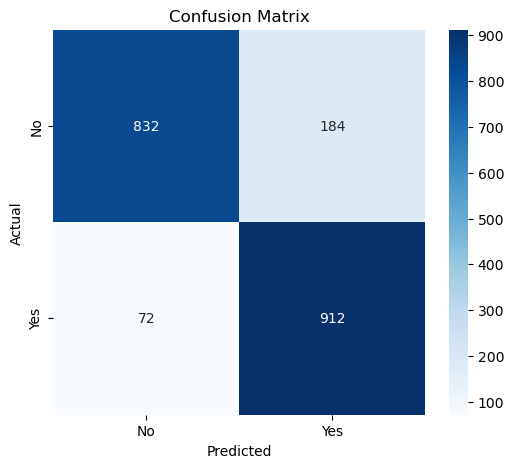

In [35]:
# Generate confusion matrix
y_pred = cnn_lstm_model.predict(x_test_cnn)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()